<a href="https://colab.research.google.com/github/matheusgirola/Halmos_Naive_Set_Theory_LaTeX_Reedition/blob/main/Halmos_Naive_Set_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this notebook, we will use Optimal Character Recognition (OCR) with *keras_ocr* to help us "translate" the digitilized book *Naive Set Theory* by Paul Halmos into a PDF with a new and more interactable format.

There is two reasons for this project: first, the book in digitilized state is perfectly readable, but it does'nt allow search words with *Cntrl + F* and does'nt have a summary with it. The second reason is purely personal, I have a passion and gratitude for this book and, while I want to learn OCR, I decided to re-edited it as a homage.

The PDF used is public domain and, so, freely available in the internet. Therefore, the resulting re-edition of the book at the end of this project has no lucrative ends by any means. The final PDF will be written in LaTeX and available for download in the repository.




### Reading One Page



First, lets download all the necessary packages. However, we will be importing them as the notebook advances to make more clear the finality of each one

In [ ]:
!apt-get install poppler-utils 
!pip install pdf2image
!pip install opencv-python
!pip install -q keras-ocr

To read the text using OCR, we will reformat each page of the book into a image. We will do this using the *pdf2image* package with the *conver_from_bytes* function, which will save each page as images in a list. After that, we will save each page as individual *.jpg* file.

In [ ]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

from pdf2image.exceptions import (
PDFInfoNotInstalledError,
PDFPageCountError,
PDFSyntaxError
)

# Convert all the pages into images
images = convert_from_bytes(open('Halmos_NaiveSetTheory.pdf', 'rb').read())

# For each page in "images" save the page as individual jpg file
i = 1
for image in images:
    image_name = "Page_" + str(i) + ".jpg"  
    image.save(image_name, "JPEG")
    i = i+1  

No we will use *matplotlib.pyplot* to "plot" the image file of one of the pages to see if it worked.

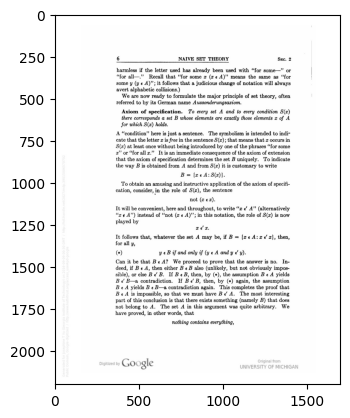

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread("Page_19.jpg")
plt.imshow(image)

The image file is plotted with the size of its dimensions in the x and y axis. 

To better execution of the OCR we will need to make some image pre-processing. First, note there is a lot of white space between the text and the borders. Also, the watermarks in the bottom of each page will only be noise by now, and we can add them in the end of the project.

We will solve both problems by redimensioning the page to contain only the main text using *cv2*

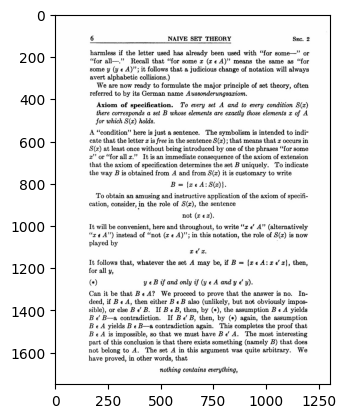

In [ ]:
import cv2

image_name = "Page_19.jpg"

# Import the image
img = cv2.imread(image_name)

# We resize based on the dimensions of the y and x axis
new_img = img[150:1900, 200: 1500]

# rewrite the image file with the resized one
cv2.imwrite("Page_19.jpg", new_img)

image = plt.imread("Page_19.jpg")
plt.imshow(image, cmap='gray')

With the resized version, we now will use the *Pillow* package to increase it's resolution to 300 DPI to make sure it's good enough resolution to the OCR work.

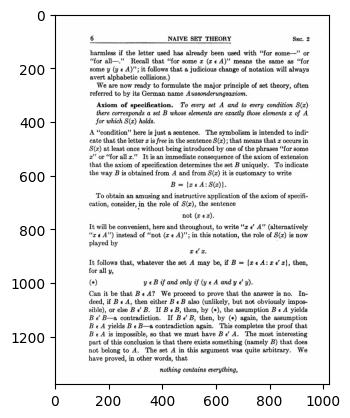

In [ ]:
from PIL import Image

img = Image.open("Page_19.jpg")
length_x, width_y = img.size
factor = min(1, float(1024.0 / length_x))
size = int(factor * length_x), int(factor * width_y)
im_resized = img.resize(size, Image.ANTIALIAS)
im_resized.save("Page_19.jpg", dpi=(300, 300))

plt.imshow(im_resized, cmap='gray')

Now we are finished with the pre-processing steps. There is a lot of of other techniques we could use, but since the digitilized version is pretty good there is no reason to overkill the pages with unnecessary techniques. For now, we can already test how well the OCR will perform in the current quality of image.

We will be using *keras_ocr* for no specific and undebatable reason: I just want to see how it will peform. Its likely that *easyocr* and *PyTesseract* would peform as good as *keras_ocr*, and so I choose the last one because its pretty easy to set up and I just one to try it out.

In [ ]:
import keras_ocr

# Activate inbuilt pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# I jut have one image to send to the pipeline
image = [
    keras_ocr.tools.read(img) for img in ['/content/Page_19.jpg']
]

# generate text predictions from the images
prediction = pipeline.recognize(image)

Online examples of *keras_ocr* print the image with box highlightning the words in the image with squares, tracing a line to edge showing what word predicted. I dindt do that because, well, the resulting image was a cloud of squares and words. Instead, we will save each word predicted in a list of strings and join them to output the whole text of the page. 

In [ ]:
predicted_image = prediction[0]

str = " "

text = [str + " " + predicted_image[i][0] for i in range(0, len(predicted_image))]
"".join(text)

'  naive  set  theory  sec  2  sfor  harmless  if  the  letter  used  has  already  been  used  with  somes  or  sfor  yy  recall  sfor  sfor  allaes  that  x  ay  the  some  means  x  same  e  as  ayi  judicious  it  follows  that  change  of  notation  will  y  always  some  a  y  e  alphabetic  collisions  avert  d  we  formulate  of  ready  the  major  principle  set  theory  often  to  are  now  referred  by  german  aussonderungsaxiom  to  its  name  axiom  sx  of  specificatione  to  a  and  condition  set  to  every  every  there  corresponds  b  whose  elements  elements  exactly  those  of  a  set  a  are  x  which  sx  jor  holds  cc  a  conditionty  here  is  the  symbolism  intended  indi  just  sentence  is  to  a  sxi  that  the  letter  is  free  in  the  that  that  in  cate  sentence  means  x  x  occurs  sex  of  sfor  least  without  being  introduced  by  the  phrases  at  once  one  some  sfor  it  immediate  of  of  all  is  the  axiom  extension  x  or  conseque

The resulting text has some clear problems: it dind't read any of the quotation marks (*"*) in the text, instead returned them as *s*. It also didn't return any of the mathematical symbols. Both of these was expected by the way that *keras_ocr* works, and despite that the overall text is pretty good.

Now we will save the text as *.txt* file to revise and reedited later in LaTeX.

In [ ]:
with open('page_19.txt', 'w') as f:
    f.write(Page_19)

with open("page_19.txt", "r") as f:
  lines = f.readlines()
print(lines[0])

 naive set theory sec 2 harmless if the letter used has already been used with somes or yy recall sfor sfor that x ay the means same as judicious follows that change of notation will always a e alphabetic collisions d formulate of the major principle set theory often are now by german aussonderungsaxiom its name sx specificatione to a and condition to every corresponds b whose elements elements those of a a are x sx holds a conditionty here is the symbolism intended indi sentence is to sxi the letter is free in the that that in sentence means x occurs of sfor without being introduced by the phrases once one some it immediate of of is the axiom extension or consequence an specifcation determines to indicate the axiom the b uniquely the b obtained from and from sx a it is customary write way sxye x as e and instructive application of of specif amusing the axiom role of sixy the consider in the sentence x e cx will convenient here and throughout ap lalternatively to write e of go role of 

# **Reading the Whole Book**





In this section, we will repeat the above process to the wgole book, starting from the Page 10, which is the Preface and the actual part of the text we need OCR. The only difference is that we will save the resulting *.txt* files in Google Drive.

In [ ]:
# Resize each page
for page in range(10, 122):

  PAGE = "Page_" + str(page) + ".jpg"  

  img = cv2.imread(PAGE)

  new_img = img[150:1900, 200: 1500]

  cv2.imwrite("Page_" + str(page) + ".jpg" , new_image)

In [ ]:
# Increase resolution
from PIL import Image

for page in range(10, 122):

  PAGE = "Page_" + str(page) + ".jpg"

  img = Image.open(PAGE)
  length_x, width_y = img.size
  factor = min(1, float(1024.0 / length_x))
  size = int(factor * length_x), int(factor * width_y)
  im_resized = img.resize(size, Image.ANTIALIAS)
  im_resized.save(PAGE, dpi=(300, 300))

In [ ]:
# Run OCR and save txt file in Google Drive
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

for page in range(10, 122):

  PAGE = "Page_" + str(page) + ".jpg" 

  image = [
      keras_ocr.tools.read(img) for img in [PAGE]
  ]

  # generate text predictions from the images
  prediction = pipeline.recognize(image)

  predicted_image = prediction[0]

  space = " "

  temp_str = [space + " " + predicted_image[i][0] 
              for i in range(0, len(predicted_image))]

  FULL_PAGE =  " ".join(temp_str)

  TXT_FILE = "page_" + str(page) + ".txt"

  with open("/content/drive/MyDrive/Halmos_txt_files/" + TXT_FILE, 'w') as f:
    f.write(FULL_PAGE)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 55ms/step
